In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

In [3]:
aal = pd.read_csv("AAL.csv")
dis = pd.read_csv("DIS.csv")
pep = pd.read_csv("PEP.csv")

In [4]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,4.562868,4.657142,4.393175,4.496876,9837300,0.0,0,-1.446312,4.866371,...,NaN,0.263968,0.296964,6.603778,0.263968,0.245113,5.450736,0.263968,0.360374,8.013879
1,2010-01-05,4.515732,5.062522,4.440312,5.005957,25212000,0.0,0,11.320767,5.856243,...,-7.191102,0.622209,0.329960,6.591340,0.622209,0.255588,5.105672,0.622209,0.361235,7.216095
2,2010-01-06,4.892829,5.071950,4.713708,4.798555,16597900,0.0,0,-4.143108,6.147385,...,-5.942541,0.358242,0.349757,7.288804,0.358242,0.257264,5.361276,0.358242,0.358616,7.473415
3,2010-01-07,4.770272,5.119086,4.760845,4.939965,14033400,0.0,0,2.946936,5.043731,...,-7.891070,0.358241,0.328074,6.641222,0.358241,0.258730,5.237491,0.358241,0.357007,7.226919
4,2010-01-08,4.968247,5.119085,4.770271,4.845690,12760000,0.0,0,-1.908414,5.088172,...,-7.613001,0.348814,0.332788,6.867707,0.348814,0.262501,5.417210,0.348814,0.354463,7.315023


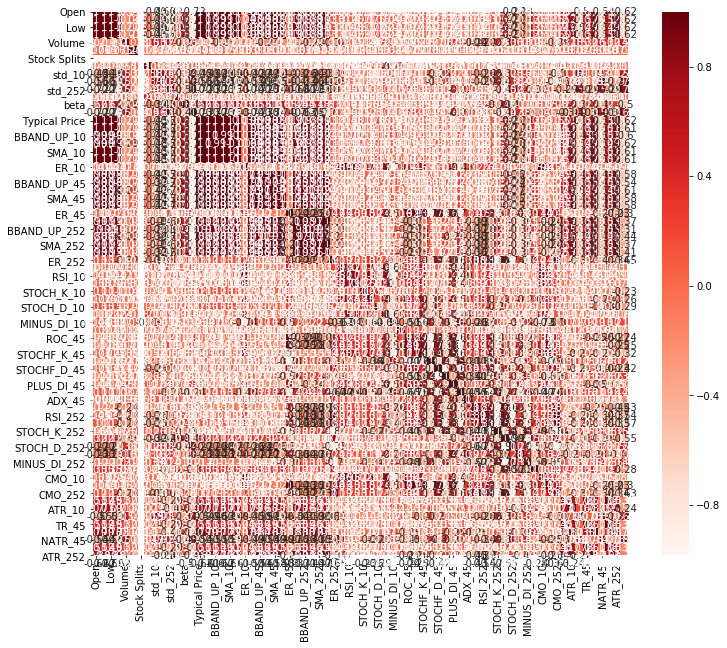

In [5]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(cor["Open"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [19]:
aal_df = aal[rel_feat["sel_col"]]

In [26]:
print(len(aal.columns), len(rel_feat))

73 33


In [21]:
aal_df.columns

Index(['Open', 'High', 'Low', 'Close', 'std_45', 'std_252', 'beta',
       'residual_volatility', 'Typical Price', 'BBAND_10', 'BBAND_UP_10',
       'BBAND_DOWN_10', 'SMA_10', 'EMA_10', 'BBAND_45', 'BBAND_UP_45',
       'BBAND_DOWN_45', 'SMA_45', 'EMA_45', 'BBAND_252', 'BBAND_UP_252',
       'BBAND_DOWN_252', 'SMA_252', 'EMA_252', 'TR_10', 'ATR_10', 'NATR_10',
       'TR_45', 'ATR_45', 'NATR_45', 'TR_252', 'ATR_252', 'NATR_252'],
      dtype='object')

In [22]:
aal_close_px = aal_df['Close']

In [24]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


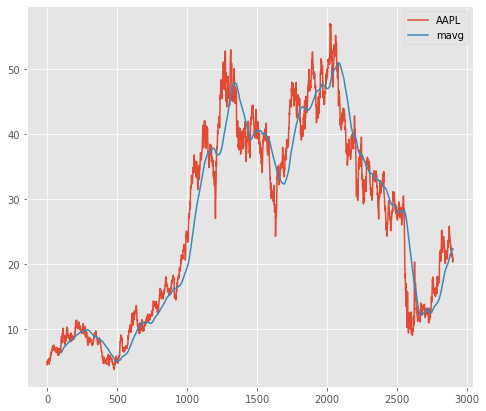

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

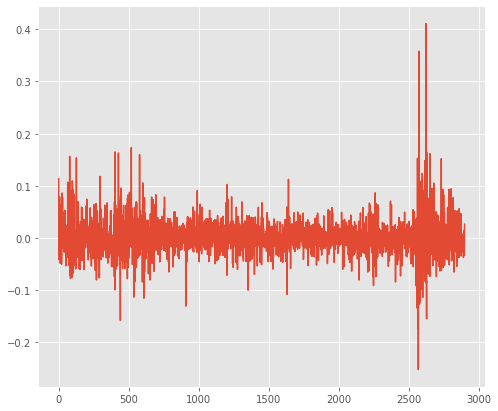

In [29]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [39]:
aal.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'daily_returns', 'std_10', 'std_45', 'std_252',
       'market_daily_returns', 'beta', 'residual_volatility', 'Typical Price',
       'BBAND_10', 'BBAND_UP_10', 'BBAND_DOWN_10', 'SMA_10', 'EMA_10', 'ER_10',
       'BBAND_45', 'BBAND_UP_45', 'BBAND_DOWN_45', 'SMA_45', 'EMA_45', 'ER_45',
       'BBAND_252', 'BBAND_UP_252', 'BBAND_DOWN_252', 'SMA_252', 'EMA_252',
       'ER_252', 'ROC_10', 'RSI_10', 'STOCHF_K_10', 'STOCH_K_10',
       'STOCHF_D_10', 'STOCH_D_10', 'PLUS_DI_10', 'MINUS_DI_10', 'ADX_10',
       'ROC_45', 'RSI_45', 'STOCHF_K_45', 'STOCH_K_45', 'STOCHF_D_45',
       'STOCH_D_45', 'PLUS_DI_45', 'MINUS_DI_45', 'ADX_45', 'ROC_252',
       'RSI_252', 'STOCHF_K_252', 'STOCH_K_252', 'STOCHF_D_252', 'STOCH_D_252',
       'PLUS_DI_252', 'MINUS_DI_252', 'ADX_252', 'CMO_10', 'CMO_45', 'CMO_252',
       'TR_10', 'ATR_10', 'NATR_10', 'TR_45', 'ATR_45', 'NATR_45', 'TR_252',
       'ATR_252', 'NATR_

In [40]:
# predicting stock prices, feature engineering

aal_dfreg = aal[['Close', 'Volume']]
aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
import math
from sklearn import preprocessing
# Drop missing value
aal_dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(aal_dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Close'
aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
X = np.array(aal_dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(aal_dfreg['label'])
y = y[:-forecast_out]

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
# model generation

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [50]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [52]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9385616130372888
The quadratic regression 2 confidence is  0.9411557101501642
The quadratic regression 3 confidence is  0.9414936689981913
The knn regression confidence is  0.921917193309673


In [55]:
forecast_set = clfknn.predict(X_lately)
aal_dfreg['Forecast'] = np.nan

C:\Users\Kinjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
forecast_set

array([23.45499992, 22.27999973, 22.70499992, 23.40499973, 23.05000019,
       23.3949995 , 22.96000004, 23.40499973, 23.05000019, 23.22500038,
       25.95001602, 24.06396294, 23.22500038, 22.70499992, 22.90999985,
       22.90999985, 23.3949995 , 26.84580708, 23.42000008, 23.6809864 ,
       23.31000042, 22.48999977, 22.90999985, 23.22500038, 23.3949995 ,
       18.92096949, 23.05000019, 23.20500088, 23.22500038])

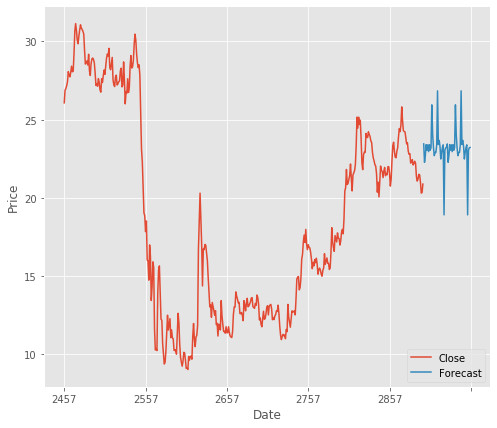

In [78]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = aal_dfreg.iloc[-1].name
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    aal_dfreg.loc[next_date] = [np.nan for _ in range(len(aal_dfreg.columns)-1)]+[i]
aal_dfreg['Close'].tail(500).plot()
aal_dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [79]:
print(next_unix)

2957 days 00:00:00
